In [356]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

df1 = pd.read_csv("house_prices.csv")

In [357]:
df1.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [358]:
temp = df1[["Brick"]]
ohe = OneHotEncoder()
ans = ohe.fit_transform(temp).toarray()

In [359]:
df2 = pd.DataFrame(ans , columns =["No_Brick","Yes_Brick"])
df1["Brick"] = df2["Yes_Brick"]
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick
0,1,114300,1790,2,2,2,0.0
1,2,114200,2030,4,2,3,0.0
2,3,114800,1740,3,2,1,0.0
3,4,94700,1980,3,2,3,0.0
4,5,119800,2130,3,3,3,0.0


In [360]:
ord = [["East","North","West"]]
oe = OrdinalEncoder(categories = ord)
df1["Neighborhood"].unique()


array(['East', 'North', 'West'], dtype=object)

In [361]:
temp3 = df1[["Neighborhood"]]
temp3.head()
df1["Neighborhood"] = oe.fit_transform(temp2)

In [362]:
df1.corr()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
Home,1.000000,0.108190,0.168553,-0.068568,0.127694,-0.053597,0.037376,0.059871
Price,0.108190,1.000000,0.552982,0.525926,0.523258,-0.313636,0.452817,0.490762
SqFt,0.168553,0.552982,1.000000,0.483807,0.522745,0.336923,0.079792,0.115770
Bedrooms,-0.068568,0.525926,0.483807,1.000000,0.414556,0.114271,0.046380,0.322499
Bathrooms,0.127694,0.523258,0.522745,0.414556,1.000000,0.143793,0.171977,0.163464
Offers,-0.053597,-0.313636,0.336923,0.114271,0.143793,1.000000,-0.144986,-0.177136
Brick,0.037376,0.452817,0.079792,0.046380,0.171977,-0.144986,1.000000,-0.021217
Neighborhood,0.059871,0.490762,0.115770,0.322499,0.163464,-0.177136,-0.021217,1.000000


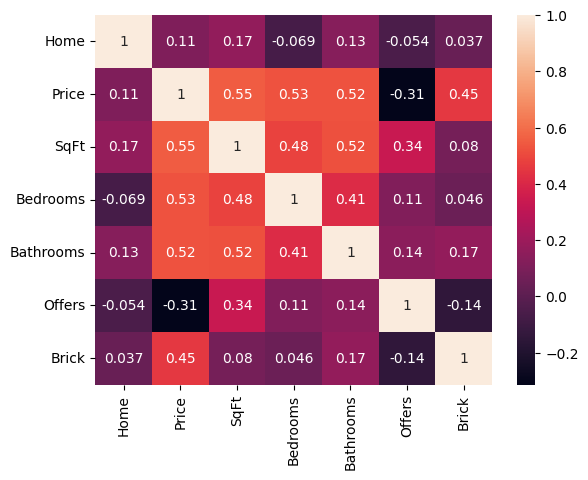

In [363]:
# check the co-relation between data columns
sns.heatmap(df.corr() , annot = True)
plt.show()

In [364]:
# offers are negatively co-related with price
# and sqFt , bedrooms and bathrooms has 50% co-relation and home as poor corr


In [365]:
#  now all data enocoded we can make the regression mode the chek the score for efficiency
x = df1.drop(columns=["Price"])
y = df1[["Price"]]


In [366]:
x.head()

,Home,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,1790,2,2,2,0.0,0.0
1,2,2030,4,2,3,0.0,0.0
2,3,1740,3,2,1,0.0,0.0
3,4,1980,3,2,3,0.0,0.0
4,5,2130,3,3,3,0.0,0.0


In [367]:
# ss = StandardScaler()
# ss.fit(x)
# x = pd.DataFrame(ss.transform(x) , columns = x.columns)
# x.head()

In [368]:
y.head()

,Price
0,114300
1,114200
2,114800
3,94700
4,119800


In [369]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size =.20 , random_state =42)

In [370]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge

In [371]:
lr = LinearRegression()

In [372]:
lr.fit(x_train , y_train)

LinearRegression()

In [373]:
lr.score(x_test , y_test)*100

77.8862812019636

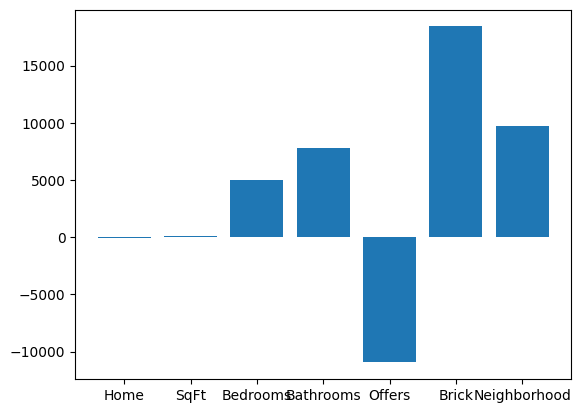

In [374]:
# lr.coef_[0]
# x.columns.shape

plt.bar(x.columns , lr.coef_[0])
plt.show()

In [375]:
# check for lasso
la = Lasso(alpha =1.0)
la.fit(x_train , y_train)
la.score(x_test , y_test)*100

77.88354909935653

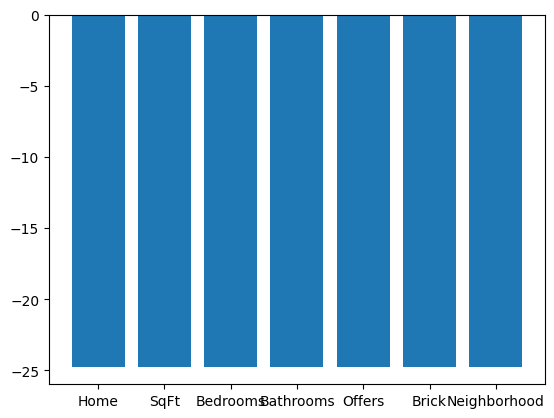

In [376]:
# graph for Lassso
plt.bar(x.columns , la.coef_[0])
plt.show()

In [377]:
# check for Ridge
ra = Ridge(alpha =40)
ra.fit(x_train , y_train)
ra.score(x_test , y_test)*100

67.11864190188714

In [378]:
ra.coef_

array([[-7.78179430e+00,  7.55239406e+01,  3.84144571e+03,
         3.81401649e+03, -9.34825902e+03,  6.89047454e+03,
         6.60218999e+03]])

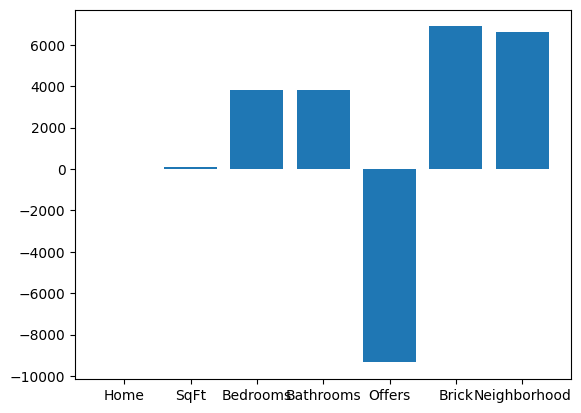

In [379]:
plt.bar(x.columns , ra.coef_[0])
plt.show()

In [380]:
# checking for errors 
# mse rmse mae
from sklearn.metrics import mean_squared_error , mean_absolute_error 

In [381]:
# for linerRegression
print(mean_squared_error(y_test , lr.predict(x_test)))
print(mean_absolute_error(y_test , lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test , lr.predict(x_test))))

130338013.25111333
9499.965442507402
11416.567489885623


In [382]:
# for Lasso
print(mean_squared_error(y_test , la.predict(x_test)))
print(mean_absolute_error(y_test , la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test , la.predict(x_test))))

130354116.2335675
9500.547226079752
11417.272714338022


In [383]:
# for Ridge
print(mean_squared_error(y_test , ra.predict(x_test)))
print(mean_absolute_error(y_test , ra.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test , ra.predict(x_test))))

193802359.82231015
11607.817948985701
13921.291600362021


In [384]:
coff_df = pd.DataFrame({"Cols:": x.columns ,"LinearRegression": lr.coef_[0] ,"Lasso": la.coef_[0] ,"Ridge": ra.coef_[0]})

In [385]:
coff_df

,Cols:,LinearRegression,Lasso,Ridge
0,Home,-24.748451,-24.745063,-7.781794
1,SqFt,68.138471,-24.745063,75.523941
2,Bedrooms,4991.979069,-24.745063,3841.445708
3,Bathrooms,7821.761139,-24.745063,3814.016493
4,Offers,-10943.771623,-24.745063,-9348.259023
5,Brick,18412.241802,-24.745063,6890.474535
6,Neighborhood,9684.424317,-24.745063,6602.189994
